In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [202]:
# Load the data
df = pd.read_csv('food_consumption.csv', index_col=0)
df.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [203]:
# Filter for Belgium
be_consumption = df[df['country'] == 'Belgium']
columns_be = list(be_consumption.select_dtypes(include=[np.number]).columns)
result = be_consumption[columns_be].agg(['mean', 'median'])
display(result)

,consumption,co2_emission
mean,42.132727,100.19
median,12.590000,21.34


In [204]:
# Filter for USA
usa_consumption = df[df['country'] == 'USA']
columns_usa = list(usa_consumption.select_dtypes(include=[np.number]).columns)
result = usa_consumption[columns_usa].agg(['mean', 'median'])
display(result)

,consumption,co2_emission
mean,44.65,156.26
median,14.58,15.34


In [205]:
be_and_usa = df[(df['country'] == 'Belgium') | (df['country'] == 'USA')]

# Group by country Select consumption columns and calculate the mean and median
result = be_and_usa.groupby('country')['consumption'].agg(['mean', 'median'])
display(result)

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


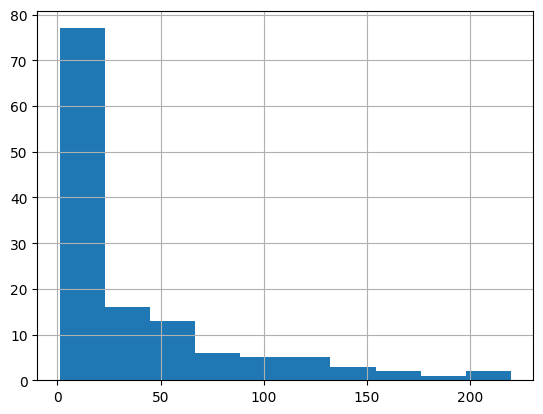

In [206]:
# Subset food_consumption to get the rows where food_category is 'rice' & save the result to rice_consumption
rice_consumption = df[df['food_category'] == 'rice']

# Create a histogram of co2_emission for rice and show the plot use plt
rice_consumption['co2_emission'].hist()
plt.show()

In [207]:
# Use .agg() to calculate the mean and median of co2_emission for rice
result = rice_consumption['co2_emission'].agg(['mean', 'median'])
display(result)

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

In [208]:
# Calculate the quantiles of the co2_emission column of food_consumption
print(np.quantile(df['co2_emission'],[0, 0.25, 0.5, 0.75, 1]))

# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption
print(np.quantile(df['co2_emission'],[0, 0.2, 0.4, 0.6, 0.8, 1]))

# Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles)
print(np.quantile(df['co2_emission'], np.linspace(0, 1, 10)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


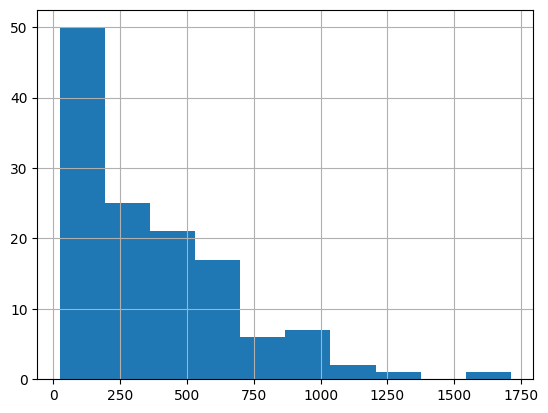

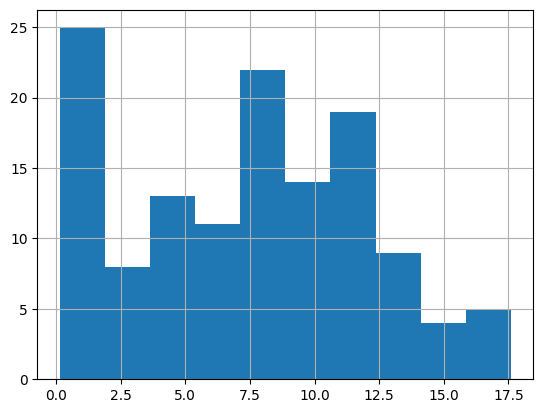

In [209]:
# Print variance and sd of co2_emission for each food_category
display(df.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Create histogram of co2_emission for food_category 'beef'
df[df['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
df[df['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

In [210]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = df.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [211]:
# Load the data
amir_deals = pd.read_csv('amir_deals.csv', index_col=0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [212]:
# Count the number of deals
deal_counts = amir_deals['product'].value_counts()

# Calculate the probablity of picking a deal with each product
deal_probs = deal_counts / deal_counts.sum()
# deal_probs = deal_counts / deal_counts.shape[0]

print(deal_probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [213]:
# Set the random seed
np.random.seed(24)

# Take a sample of 5 deals without replacement
sample_without_replacement = amir_deals.sample(n=5, replace=False)
print("Sample without replacement:")
print(sample_without_replacement)

# Take a sample of 5 deals with replacement
sample_with_replacement = amir_deals.sample(n=5, replace=True)
print("\nSample with replacement:")
print(sample_with_replacement)

Sample without replacement:
       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11

Sample with replacement:
       product   client status   amount  num_users
134  Product D  Current    Won  5992.86         98
102  Product H  Current    Won  5116.34         63
111  Product B  Current    Won   696.88         44
50   Product B  Current    Won  3488.36         79
57   Product D  Current    Won  6820.84         42


In [214]:
# Load the data
restaurant_groups = pd.read_csv('restaurant_groups.csv', index_col=0)
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


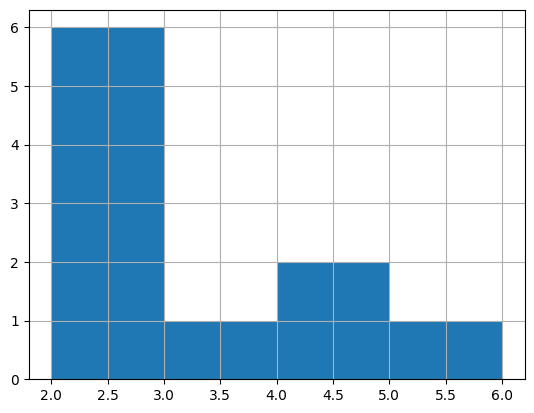

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
The expected value is 2.9000000000000004
The probability is  0.30000000000000004


In [215]:
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']
print(size_dist)

# Calulate Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print('The expected value is', expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print('The probability is ',prob_4_or_more)

In [216]:
# Import uniform from scipy.stats
from scipy.stats import uniform

min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1-uniform.cdf(5,0,30)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30)-uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


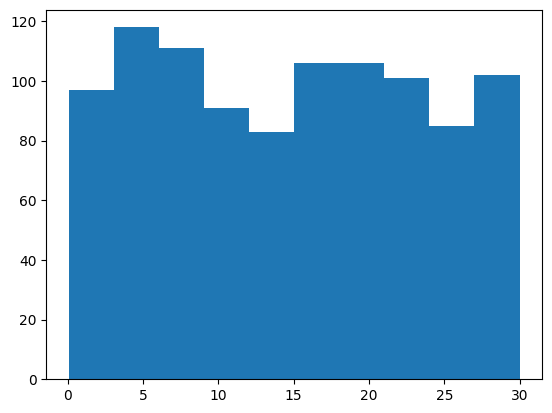

In [217]:
# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

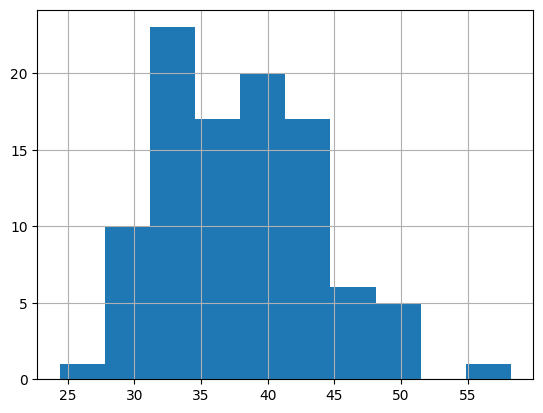

In [218]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
    # Take sample of 20 num_users
    samp_20 = amir_deals['num_users'].sample(20, replace=True)
    # Calculate mean of samp_20
    samp_20_mean = np.mean(samp_20)
    # Append samp_20_mean to sample_means
    sample_means.append(samp_20_mean)

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()

plt.show()